### Import pakietów

In [39]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Wczytanie i przygotowanie danych

In [16]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")],sep="\n")

39562616
84514582
96008085


In [17]:
product_id = input("Podaj kod produktu: ")

In [24]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,useful,unuseful,post_date,purchase_date
0,12535429,g...6,None,3/5,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
1,13551598,b...a,Polecam,4/5,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
2,18299406,U...o,Polecam,"4,5/5",Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
3,15226709,k...l,Polecam,4/5,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
4,13501735,g...k,None,"3,5/5",produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
...,...,...,...,...,...,...,...,...,...,...,...
81,13466015,w...d,Nie polecam,1/5,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29
82,15730485,b...o,Nie polecam,2/5,POLECAM,[],[],0,0,2022-02-21 10:21:10,2022-02-14 08:19:16
83,15798075,b...o,Nie polecam,"0,5/5",polecam,[],[],0,1,2022-03-09 11:10:06,2022-03-08 11:01:43
84,11644241,Użytkownik Ceneo,Nie polecam,1/5,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],3,1,2020-01-26 21:28:27,None


In [25]:
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.useful = opinions.useful.astype(int)
opinions.unuseful = opinions.unuseful.astype(int)

opinions

,opinion_id,author,recommendation,stars,content,pros,cons,useful,unuseful,post_date,purchase_date
0,12535429,g...6,None,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
1,13551598,b...a,Polecam,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
2,18299406,U...o,Polecam,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
3,15226709,k...l,Polecam,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
4,13501735,g...k,None,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
...,...,...,...,...,...,...,...,...,...,...,...
81,13466015,w...d,Nie polecam,1.0,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29
82,15730485,b...o,Nie polecam,2.0,POLECAM,[],[],0,0,2022-02-21 10:21:10,2022-02-14 08:19:16
83,15798075,b...o,Nie polecam,0.5,polecam,[],[],0,1,2022-03-09 11:10:06,2022-03-08 11:01:43
84,11644241,Użytkownik Ceneo,Nie polecam,1.0,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],3,1,2020-01-26 21:28:27,None


###  Podstawowe statystyki

In [32]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros) and bool(o.cons), axis=1).sum()
average_stars = opinions.stars.mean()

print(f"Liczba opinii o produkcie: {opinions_count}")
print(f"Liczba opiniiz podaną listą zalet: {pros_count}")
print(f"Liczba opiniiz podaną listą wad: {cons_count}")
print(f"Liczba opiniiz podaną listą zalet i listą wad: {pros_cons_count}")
print(f"Średnia ocena produktu: {average_stars:.3}")


Liczba opinii o produkcie: 86
Liczba opiniiz podaną listą zalet: 40
Liczba opiniiz podaną listą wad: 10
Liczba opiniiz podaną listą zalet i listą wad: 8
Średnia ocena produktu: 4.38


In [36]:
pros = opinions.pros.explode().dropna().value_counts()
cons = opinions.cons.explode().dropna().value_counts()
print(f"Lista unikatowych zalet: {len(pros)}")
print(f"Lista unikatowych wad: {len(cons)}")
print(pros,cons)

Lista unikatowych zalet: 15
Lista unikatowych wad: 4
pros
jakość wydruków                  34
szybkość wydruku                 33
jakość wydruku                   28
głośność pracy                   23
wydajność                        15
czyste napełnianie atramentem    11
wydajna                          10
niski koszt wydruku               9
tani atrament                     4
drukowanie poprzez e-mail         3
nowoczesność                      3
doskonały design                  2
innowacyjność                     2
podajnik dokumentów               1
zajmuje mało miejsc               1
Name: count, dtype: int64 cons
głośność pracy      7
szybkość wydruku    4
jakość wydruków     3
jakość wydruku      2
Name: count, dtype: int64


### Wykresy

In [63]:
recommendations = opinions.recommendation.value_counts(dropna=False).reindex(['Nie polecam','Polecam',None],fill_value=0)
recommendations

recommendation
Nie polecam     7
Polecam        73
None            6
Name: count, dtype: int64

<Axes: title={'center': 'Rozkład rekomendacji w opiniach o produkcie: 84514582'}>

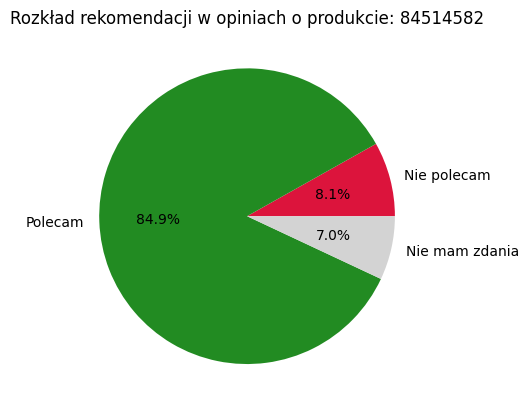

In [68]:
recommendations.plot.pie(
    label="",
    title=f"Rozkład rekomendacji w opiniach o produkcie: {product_id}",
    labels = ['Nie polecam','Polecam','Nie mam zdania'],
    colors = ['crimson','forestgreen', 'lightgrey'],
    autopct = '%1.1f%%'
    )